In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
import xarray as xr
from cmdstanpy import CmdStanModel

In [2]:
F = len('Radosław')
L = len('Suliński')
N = 100*(L+F)

In [3]:
data = {'N': N}
model1 = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [4]:
sample1 = model1.sample(data=data, chains=1, iter_warmup=1000, iter_sampling=1)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [5]:
model2 = CmdStanModel(stan_file='code_2.stan')
sample2 = model2.sample(data=data, chains=1, iter_warmup=1000, iter_sampling=1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [6]:
y1 = sample1.stan_variable('y').flatten()

(array([1.000e+00, 0.000e+00, 5.060e+02, 1.082e+03, 5.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00]),
 array([-11.4333 ,  -7.76116,  -4.08902,  -0.41688,   3.25526,   6.9274 ,
         10.59954,  14.27168,  17.94382,  21.61596,  25.2881 ]),
 <BarContainer object of 10 artists>)

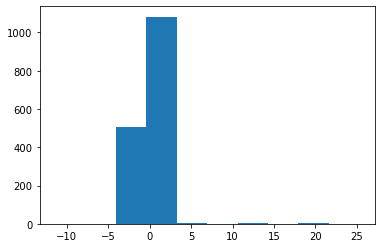

In [7]:
plt.hist(y1)

In [8]:
model3 = CmdStanModel(stan_file='code_3.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [9]:
model4 = CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [10]:
data = {'N' : N, 'y' : y1}


In [11]:
fit3 = model3.sample(data=data, chains=1, iter_warmup=1000, iter_sampling=1)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [12]:
print(fit3.stan_variable('sigma'))
print(fit3.stan_variable('mu'))

[1.50085]
[0.0914834]


In [13]:
fit4 = model4.sample(data=data, chains=1, iter_warmup=1000, iter_sampling=1)
print(fit4.stan_variable('sigma'))
print(fit4.stan_variable('mu'))
print(fit4.stan_variable('nu'))

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



[0.864967]
[0.0714572]
[4.798]


In [14]:
y3 = fit3.stan_variable('y_hat').flatten()
ll3 = fit4.stan_variable('log_lik').flatten()
y4 = fit4.stan_variable('y_hat').flatten()
ll4 = fit4.stan_variable('log_lik').flatten()

C:\Users\Data\anaconda3\envs\DataAnalytics\lib\site-packages\arviz\stats\stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
C:\Users\Data\anaconda3\envs\DataAnalytics\lib\site-packages\arviz\stats\stats.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale)])
C:\Users\Data\anaconda3\envs\DataAnalytics\lib\site-packages\arviz\stats\stats.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale)])


<AxesSubplot:xlabel='Log'>

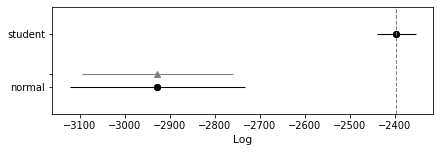

In [40]:
dataset3 = az.from_cmdstanpy(fit3, log_likelihood='log_lik')
dataset4 = az.from_cmdstanpy(fit4, log_likelihood='log_lik')

compare_dict = {'normal': dataset3, 'student': dataset4}
comparison = az.compare(compare_dict, ic='waic')
az.plot_compare(comparison)

In [41]:
comparison

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
student,0,-2396.679993,0.0,0.000000,1.0,43.387964,0.000000,False,log
normal,1,-2927.234200,0.0,530.554207,0.0,195.022753,167.854223,False,log


In [44]:
#Loo fails, didn't manage to get it to work
comparison = az.compare(compare_dict, ic='loo')
az.plot_compare(comparison)

C:\Users\Data\anaconda3\envs\DataAnalytics\lib\site-packages\arviz\stats\stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(


IndexError: index -2 is out of bounds for axis 0 with size 1

In [45]:
y2 = sample2.stan_variable('y').flatten()

(array([  8.,  29., 149., 325., 445., 402., 181.,  50.,   8.,   3.]),
 array([-8.40855 , -6.585634, -4.762718, -2.939802, -1.116886,  0.70603 ,
         2.528946,  4.351862,  6.174778,  7.997694,  9.82061 ]),
 <BarContainer object of 10 artists>)

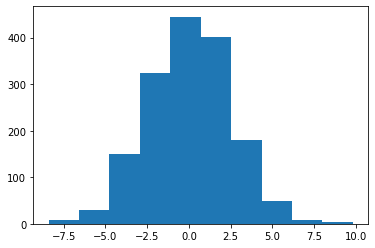

In [46]:
plt.hist(y2)

In [47]:
model5 = CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Data\data_analytics_jupyter\code_5.stan to exe file C:\Users\Data\data_analytics_jupyter\code_5.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Data\data_analytics_jupyter\code_5.exe


In [48]:
datasets = []
for k in range(1, 4):
    data = {'N' : N, 'y' : y2, 'K':k}
    fit5 = model3.sample(data=data, chains=1, iter_warmup=1000, iter_sampling=1)
    datasets.append(az.from_cmdstanpy(fit5, log_likelihood='log_lik'))
comparison = az.compare({str(i+1): dataset for i, dataset in enumerate(datasets)}, ic='loo')
az.plot_compare(comparison)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.
C:\Users\Data\anaconda3\envs\DataAnalytics\lib\site-packages\arviz\stats\stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(


IndexError: index -2 is out of bounds for axis 0 with size 1

C:\Users\Data\anaconda3\envs\DataAnalytics\lib\site-packages\arviz\stats\stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
C:\Users\Data\anaconda3\envs\DataAnalytics\lib\site-packages\arviz\stats\stats.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale)])
C:\Users\Data\anaconda3\envs\DataAnalytics\lib\site-packages\arviz\stats\stats.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale)])
C:\Users\Data\anaconda3\envs\DataAnalytics\lib\site-packages\arviz\stats\stats.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

<AxesSubplot:xlabel='Log'>

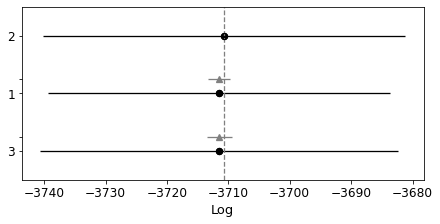

In [49]:
comparison = az.compare({str(i+1): dataset for i, dataset in enumerate(datasets)}, ic='waic')
az.plot_compare(comparison)

In [50]:
comparison

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
2,0,-3710.71461,0.0,0.00000,0.640209,29.529165,0.000000,False,log
1,1,-3711.49681,0.0,0.78220,0.111678,27.821416,1.823105,False,log
3,2,-3711.50337,0.0,0.78876,0.248112,29.133201,2.024286,False,log
